<a href="https://colab.research.google.com/github/coviidd19/DS_Startup-/blob/main/Final_Project_Kelompok_Brunei_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

Import drive

In [ ]:
from google.colab import drive
drive.mount('/drive')
%cd /drive

Mounted at /drive
/drive


In [ ]:
pwd! #kita lg ada di mana 

'/drive'

Import Library

In [ ]:
! pip install lifelines
! pip install lifetimes
! pip install kneed
! pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.1 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=8d6970f0731f2690c7c64c6ebebb0cd36b3e0acb9115a2cf9059e777d05383bd
  Stored in directory: /root/.cache/pip/wheels/16/a2/b6/582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd-gamma
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pyp

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns
sns.set()
import ast
import json
from scipy import stats
from datetime import datetime, date
import datetime as dt
import random
import os
import re
import sys
import timeit
import string
import time
from time import time
from dateutil.parser import parse
import joblib
import math
import lifelines
import squarify
from IPython.display import display
from pandas.plotting import scatter_matrix
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
# import plotly.offline as pyo 
# import plotly.graph_objs as go
# import plotly.figure_factory as ff

from scipy import stats
from scipy.stats import norm
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn import feature_selection
# from eli5.sklearn import PermutationImportance

from sklearn import ensemble
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from imblearn.datasets import make_imbalance
from statsmodels.tsa.seasonal import seasonal_decompose
from yellowbrick.cluster import KElbowVisualizer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

##Import Dataset

In [ ]:
#import dataset
# by zacky
customer = pd.read_csv("MyDrive/Final Project Brunei/Mockup Datasets/customer.csv")
transaction = pd.read_csv("MyDrive/Final Project Brunei/Mockup Datasets/transactions.csv")
click_stream = pd.read_csv("MyDrive/Final Project Brunei/Mockup Datasets/click_stream.csv")
product= pd.read_csv("MyDrive/Final Project Brunei/Mockup Datasets/product.csv", error_bad_lines=False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [ ]:
transaction.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


Change Datatype To String

In [ ]:
#ubah tipe data ke string 
transaction['product_metadata']= transaction['product_metadata'].astype('string')
#print(transaction.info())

In [ ]:
#Apply Literal Eval function
import ast
transaction['product_metadata']= transaction['product_metadata'].map(lambda x: ast.literal_eval(x))

In [ ]:
#Explode Data
transaction_temp= transaction.explode('product_metadata')

In [ ]:
#Reset Index, karena terjadi penambahan row data(efek dari explode)
transaction_temp.reset_index(inplace=True)

In [ ]:
#Drop Index Column, karena ada index baru
transaction_temp.drop('index',axis=1,inplace=True)

In [ ]:
#Menggunakan function json_normalize untuk splitting dict data
#import json
final_split = pd.json_normalize(transaction_temp['product_metadata'])

In [ ]:
#final_split.head()

In [ ]:
##Merge with Concat
merge_transaction=pd.concat([final_split, transaction_temp], axis=1, join="inner")

In [ ]:
#Check by By Head
#merge_transaction.head()

##Transaction_Data

In [ ]:
#Pilih Kolom yang akan digunakan saja
transaction_data = merge_transaction[['product_id',
                                      'quantity',
                                      'item_price',
                                      'created_at',
                                      'customer_id',
                                      'booking_id',
                                      'session_id',
                                      'payment_method',
                                      'payment_status',
                                      'promo_amount',
                                      'promo_code',
                                      'shipment_fee',
                                      'shipment_date_limit',
 #                                     'total_amount'
 ]]

In [ ]:
#Mengubah isian kolom "created_at" dan "shipment_date_limit" menjadi tahun saja
transaction_data['created_at'] = pd.to_datetime(transaction_data['created_at']).dt.year
transaction_data['shipment_date_limit'] = pd.to_datetime(transaction_data['shipment_date_limit']).dt.year

#transaction_data.head()

<ipython-input-67-980ebb71fd8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['created_at'] = pd.to_datetime(transaction_data['created_at']).dt.year
<ipython-input-67-980ebb71fd8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['shipment_date_limit'] = pd.to_datetime(transaction_data['shipment_date_limit']).dt.year


In [ ]:
#Cek kode promo by ishlaah
trial=transaction_data.groupby(['promo_code'])['booking_id'].nunique().reset_index()
#trial

In [ ]:
transaction_data.loc[(transaction_data['promo_code'] != 'AZ2022')&
                     (transaction_data['promo_code'] != 'BUYMORE')&
                     (transaction_data['promo_code'] != 'LIBURDONG')&
                     (transaction_data['promo_code'] != 'SC2022')&
                     (transaction_data['promo_code'] != 'STARTUP')&
                     (transaction_data['promo_code'] != 'WEEKENDMANTAP')&
                     (transaction_data['promo_code'] != 'WEEKENDSERU')&
                     (transaction_data['promo_code'] != 'XX2022'), 'promo_code'] = 'Tidak menggunakan kode promo'

#transaction_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


##Customer_Data

In [ ]:
#customer.head(5)
customer['first_join_date'] = pd.to_datetime(customer['first_join_date']).dt.date

In [ ]:
customer_data = customer[['customer_id',
#                          'first_name',
#                          'last_name',
#                          'email',
#                          'gender',
#                          'birthdate',
#                          'device_type',
                          'home_location',
                          'first_join_date']]
#customer_data

In [ ]:
#product.head(5)


##Product

In [ ]:
product.rename(columns={"id":"product_id"},inplace=True)

In [ ]:
#click_stream.head(5)

Click_Stream

In [ ]:
click_stream = click_stream[['session_id',
                             'event_name',
                             'event_time',
                             'event_id',
                             'traffic_source']]
#click_stream

In [ ]:
#Mengubah isian kolom "event_time" menjadi tanggal saja
#by Meliana
click_stream['event_time'] = pd.to_datetime(click_stream['event_time']).dt.year
#click_stream

##Menggabungkan data

In [ ]:
#Menggabungkan dataset
#by Meliana
data1 =customer_data.merge(transaction_data, on='customer_id').merge(product, on='product_id').merge(click_stream, on='session_id')

#Data untuk Modeling

In [ ]:
customer_transaction=customer.merge(transaction, on='customer_id', how='left')
#customer_transaction.head()

In [ ]:
sucsess= customer_transaction[(customer_transaction.payment_status == 'Success')]
#sucsess

In [ ]:
first_step = sucsess[['customer_id','first_name','last_name','first_join_date','created_at']]
#first_step

In [ ]:
# menggabungkan first name dan last name menjadi full name
first_step["full_name"] = first_step['first_name'].astype(str) +" "+ first_step["last_name"]

<ipython-input-17-4eac7576f915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_step["full_name"] = first_step['first_name'].astype(str) +" "+ first_step["last_name"]


In [ ]:
#memilih data yang dibutuhkan untuk data transformation
second_step = first_step[['customer_id',
                          'full_name',
                          'first_join_date',
                          'created_at'
                        ]]
second_step

,customer_id,full_name,first_join_date,created_at
2,7279,Bakiman Simanjuntak,2020-08-23,2020-08-23T12:53:12.916342Z
3,7279,Bakiman Simanjuntak,2020-08-23,2020-08-31T13:34:59.916342Z
4,7279,Bakiman Simanjuntak,2020-08-23,2020-09-08T13:38:30.916342Z
5,7279,Bakiman Simanjuntak,2020-08-23,2020-09-16T13:48:09.916342Z
7,7279,Bakiman Simanjuntak,2020-08-23,2020-10-02T13:46:24.916342Z
...,...,...,...,...
901873,40573,Yani Usada,2021-07-17,2021-10-21T15:43:07.139547Z
901875,40573,Yani Usada,2021-07-17,2022-01-23T19:01:48.139547Z
901876,40573,Yani Usada,2021-07-17,2022-03-11T19:03:09.139547Z
901877,40573,Yani Usada,2021-07-17,2022-04-27T20:00:55.139547Z


In [ ]:
#menghilangkan waktu pada cretaed at agar lebih mudah diubah menjadi type datetime
second_step['created_at'] = pd.to_datetime(second_step['created_at']).dt.date
#econd_step

<ipython-input-19-b0f159dea178>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_step['created_at'] = pd.to_datetime(second_step['created_at']).dt.date


In [ ]:
# mengubah tipe object menjadi date
second_step['created_at'] =  pd.to_datetime(second_step['created_at'], format='%Y-%m-%d')
second_step['first_join_date'] =  pd.to_datetime(second_step['first_join_date'], format='%Y-%m-%d')

<ipython-input-20-4e4cf182cc6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_step['created_at'] =  pd.to_datetime(second_step['created_at'], format='%Y-%m-%d')
<ipython-input-20-4e4cf182cc6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_step['first_join_date'] =  pd.to_datetime(second_step['first_join_date'], format='%Y-%m-%d')


In [ ]:
#Melakukan pemilihan maxdate pada first_join_date
third_step=second_step[second_step.groupby('customer_id').first_join_date.transform('max') == second_step.first_join_date]
third_step

,customer_id,full_name,first_join_date,created_at
2,7279,Bakiman Simanjuntak,2020-08-23,2020-08-23
3,7279,Bakiman Simanjuntak,2020-08-23,2020-08-31
4,7279,Bakiman Simanjuntak,2020-08-23,2020-09-08
5,7279,Bakiman Simanjuntak,2020-08-23,2020-09-16
7,7279,Bakiman Simanjuntak,2020-08-23,2020-10-02
...,...,...,...,...
901873,40573,Yani Usada,2021-07-17,2021-10-21
901875,40573,Yani Usada,2021-07-17,2022-01-23
901876,40573,Yani Usada,2021-07-17,2022-03-11
901877,40573,Yani Usada,2021-07-17,2022-04-27


In [ ]:
# Melakukan pemilihan maxdate pada created_at
fourth_step=third_step[second_step.groupby('customer_id').created_at.transform('max') == third_step.created_at]
#fourth_step

In [ ]:
# Variable final_customer_transaction
final_customer_transaction=fourth_step
#final_customer_transaction

In [ ]:
#Melakukan pemilihan data untuk menntukan jumlah order dan jumlah sales
sales_data_join = sucsess[['customer_id','booking_id','total_amount']]
#sales_data_join

In [ ]:
sales_dataset=sales_data_join.merge(final_customer_transaction, on='customer_id', how='inner')
#sales_dataset.info()

In [ ]:
sales_dataset = sales_dataset.astype({"total_amount":'int'}) 

In [ ]:
bahan_segment_satu=sales_dataset.groupby(['customer_id','full_name','first_join_date','created_at']).agg(
    total_order   =('booking_id','nunique'),
    total_sales   =('total_amount','sum')
)
bahan_segment_satu.sort_values(by="total_sales", ascending=False)

,,,,total_order,total_sales
customer_id,full_name,first_join_date,created_at,,
76961,Pia Nuraini,2022-07-29,2022-07-31,72,3379521024
75646,Kamaria Wijayanti,2022-07-30,2022-07-31,70,2857894900
83562,Makuta Wibisono,2022-07-16,2022-07-16,62,2309535650
3410,Prayitna Pradipta,2022-07-24,2022-07-26,74,1979500040
79647,Gina Handayani,2022-07-17,2022-07-18,56,1764662256
...,...,...,...,...,...
59098,Vanya Mandasari,2019-02-03,2019-02-04,1,34726
18584,Gawati Laksita,2021-04-11,2021-04-11,1,34118
38090,Padma Pudjiastuti,2016-10-18,2016-10-19,1,31270


In [ ]:
bahan_segment_satu['basket_size']= bahan_segment_satu['total_sales'] / bahan_segment_satu['total_order']
#bahan_segment_satu

In [ ]:
segmentation_raw = bahan_segment_satu.astype({"basket_size":'int'})
#segmentation_raw

In [ ]:
##Second Segmentation
segmentation_raw.loc[(segmentation_raw['basket_size'] < 300000), 'monetary_segementation'] = 'Low Spender'
segmentation_raw.loc[(segmentation_raw['basket_size']>=300000) & (segmentation_raw['basket_size']<=1000000), 'monetary_segementation'] = 'Normal'
segmentation_raw.loc[(segmentation_raw['basket_size']>1000000) & (segmentation_raw['basket_size']<=3000000), 'monetary_segementation'] = 'Silver'
segmentation_raw.loc[(segmentation_raw['basket_size']>3000000) & (segmentation_raw['basket_size']<=10000000), 'monetary_segementation'] = 'Gold'
segmentation_raw.loc[(segmentation_raw['basket_size']> 10000000), 'monetary_segementation'] = 'Platinum'
segmentation_raw.sort_values(by="created_at", ascending=False)

,,,,total_order,total_sales,basket_size,monetary_segementation
customer_id,full_name,first_join_date,created_at,,,,
11944,Farah Aryani,2022-07-29,2022-07-31,2,902186,451093,Normal
24916,Syahrini Kuswandari,2019-06-02,2022-07-31,63,52413258,831956,Normal
90848,Vera Mardhiyah,2022-07-30,2022-07-31,22,376061202,17093691,Platinum
90846,Wardi Saragih,2022-07-31,2022-07-31,1,436038,436038,Normal
39221,Umaya Hidayanto,2022-07-17,2022-07-31,14,6535343,466810,Normal
...,...,...,...,...,...,...,...
9914,Baktianto Iswahyudi,2016-07-04,2016-07-04,1,336925,336925,Normal
22844,Queen Haryanti,2016-07-02,2016-07-04,1,215548,215548,Low Spender
67563,Melinda Hasanah,2016-07-03,2016-07-03,1,996610,996610,Normal


In [ ]:
segment_state=segmentation_raw.reset_index()
segment_state

,customer_id,full_name,first_join_date,created_at,total_order,total_sales,basket_size,monetary_segementation
0,3,Ganep Mustofa,2018-08-25,2022-06-26,49,20891374,426354,Normal
1,8,Nilam Fujiati,2021-02-13,2022-05-15,7,3898561,556937,Normal
2,9,Hesti Purwanti,2021-06-26,2022-05-28,6,2638665,439777,Normal
3,11,Luwar Permadi,2022-03-06,2022-03-07,1,197533,197533,Low Spender
4,15,Tari Hassanah,2019-09-28,2022-01-05,5,2134870,426974,Normal
...,...,...,...,...,...,...,...,...
50237,99992,Zamira Agustina,2020-06-30,2022-05-25,12,4352229,362685,Normal
50238,99995,Lala Nasyiah,2020-08-16,2022-07-29,59,31437103,532832,Normal
50239,99997,Rizki Firgantoro,2020-04-25,2020-04-25,1,226461,226461,Low Spender
50240,99998,Tami Fujiati,2018-07-01,2022-01-25,8,6692540,836567,Normal


In [ ]:
segment_state['date_state']='2022-07-31'
segment_state['date_state'] = pd.to_datetime(segment_state['date_state'], format='%Y-%m-%d')
#segment_state

In [ ]:
segment_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50242 entries, 0 to 50241
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             50242 non-null  int64         
 1   full_name               50242 non-null  object        
 2   first_join_date         50242 non-null  datetime64[ns]
 3   created_at              50242 non-null  datetime64[ns]
 4   total_order             50242 non-null  int64         
 5   total_sales             50242 non-null  int64         
 6   basket_size             50242 non-null  int64         
 7   monetary_segementation  50242 non-null  object        
 8   date_state              50242 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(2)
memory usage: 3.4+ MB


In [ ]:
import numpy as np
segment_state['beda_bulan'] = (segment_state['date_state'] - segment_state['created_at']) / np.timedelta64(1, 'M')
segment_state

,customer_id,full_name,first_join_date,created_at,total_order,total_sales,basket_size,monetary_segementation,date_state,beda_bulan
0,3,Ganep Mustofa,2018-08-25,2022-06-26,49,20891374,426354,Normal,2022-07-31,1.149921
1,8,Nilam Fujiati,2021-02-13,2022-05-15,7,3898561,556937,Normal,2022-07-31,2.529826
2,9,Hesti Purwanti,2021-06-26,2022-05-28,6,2638665,439777,Normal,2022-07-31,2.102713
3,11,Luwar Permadi,2022-03-06,2022-03-07,1,197533,197533,Low Spender,2022-07-31,4.796813
4,15,Tari Hassanah,2019-09-28,2022-01-05,5,2134870,426974,Normal,2022-07-31,6.800961
...,...,...,...,...,...,...,...,...,...,...
50237,99992,Zamira Agustina,2020-06-30,2022-05-25,12,4352229,362685,Normal,2022-07-31,2.201277
50238,99995,Lala Nasyiah,2020-08-16,2022-07-29,59,31437103,532832,Normal,2022-07-31,0.065710
50239,99997,Rizki Firgantoro,2020-04-25,2020-04-25,1,226461,226461,Low Spender,2022-07-31,27.170989
50240,99998,Tami Fujiati,2018-07-01,2022-01-25,8,6692540,836567,Normal,2022-07-31,6.143863


In [ ]:
segmentation_fixing = segment_state.astype({"beda_bulan":'int'}) 
#segmentation_fixing

In [ ]:
segmentation_fixing.loc[(segmentation_fixing['total_order']>=1)&(segmentation_fixing['beda_bulan']>12), 'first_segmentation'] = 'Inactive'
segmentation_fixing.loc[(segmentation_fixing['total_order']>1)&(segmentation_fixing['beda_bulan']>=6)&(segmentation_fixing['beda_bulan']<=12),'first_segmentation'] = 'Defecting'
segmentation_fixing.loc[(segmentation_fixing['total_order']>1)&(segmentation_fixing['beda_bulan']<6), 'first_segmentation'] = 'Active'
segmentation_fixing.loc[(segmentation_fixing['total_order']==1)&(segmentation_fixing['beda_bulan']<6), 'first_segmentation'] = 'First Timer'
segmentation_fixing

,customer_id,full_name,first_join_date,created_at,total_order,total_sales,basket_size,monetary_segementation,date_state,beda_bulan,first_segmentation
0,3,Ganep Mustofa,2018-08-25,2022-06-26,49,20891374,426354,Normal,2022-07-31,1,Active
1,8,Nilam Fujiati,2021-02-13,2022-05-15,7,3898561,556937,Normal,2022-07-31,2,Active
2,9,Hesti Purwanti,2021-06-26,2022-05-28,6,2638665,439777,Normal,2022-07-31,2,Active
3,11,Luwar Permadi,2022-03-06,2022-03-07,1,197533,197533,Low Spender,2022-07-31,4,First Timer
4,15,Tari Hassanah,2019-09-28,2022-01-05,5,2134870,426974,Normal,2022-07-31,6,Defecting
...,...,...,...,...,...,...,...,...,...,...,...
50237,99992,Zamira Agustina,2020-06-30,2022-05-25,12,4352229,362685,Normal,2022-07-31,2,Active
50238,99995,Lala Nasyiah,2020-08-16,2022-07-29,59,31437103,532832,Normal,2022-07-31,0,Active
50239,99997,Rizki Firgantoro,2020-04-25,2020-04-25,1,226461,226461,Low Spender,2022-07-31,27,Inactive
50240,99998,Tami Fujiati,2018-07-01,2022-01-25,8,6692540,836567,Normal,2022-07-31,6,Defecting


In [ ]:
##Churn Segmentation #Churn=0, Non Churn=1
segmentation_fixing.loc[(segmentation_fixing['created_at'] < '2022-07-01'), 'churn_segmentation'] = 0
segmentation_fixing.loc[(segmentation_fixing['created_at'] >= '2022-07-01'), 'churn_segmentation'] = 1
#segmentation_fixing

In [ ]:
##Fix Churn Segmentation
segmentation_fixing.loc[(segmentation_fixing['churn_segmentation'] == 0), 'segementation_churn'] = 'Churn Customer'
segmentation_fixing.loc[(segmentation_fixing['churn_segmentation'] != 0), 'segementation_churn'] = 'Non-Churn Customer'
#segmentation_fixing

In [ ]:
segment_fix_brunei = segmentation_fixing[['customer_id',
                                          'full_name',
                                          'total_order',
                                          'total_sales',
                                          'basket_size',
                                          'monetary_segementation',
                                          'first_segmentation',
                                          'churn_segmentation',
                                          'segementation_churn']]
segment_fix_brunei

,customer_id,full_name,total_order,total_sales,basket_size,monetary_segementation,first_segmentation,churn_segmentation,segementation_churn
0,3,Ganep Mustofa,49,20891374,426354,Normal,Active,0.0,Churn Customer
1,8,Nilam Fujiati,7,3898561,556937,Normal,Active,0.0,Churn Customer
2,9,Hesti Purwanti,6,2638665,439777,Normal,Active,0.0,Churn Customer
3,11,Luwar Permadi,1,197533,197533,Low Spender,First Timer,0.0,Churn Customer
4,15,Tari Hassanah,5,2134870,426974,Normal,Defecting,0.0,Churn Customer
...,...,...,...,...,...,...,...,...,...
50237,99992,Zamira Agustina,12,4352229,362685,Normal,Active,0.0,Churn Customer
50238,99995,Lala Nasyiah,59,31437103,532832,Normal,Active,1.0,Non-Churn Customer
50239,99997,Rizki Firgantoro,1,226461,226461,Low Spender,Inactive,0.0,Churn Customer
50240,99998,Tami Fujiati,8,6692540,836567,Normal,Defecting,0.0,Churn Customer


In [ ]:
segment_fix_brunei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50242 entries, 0 to 50241
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             50242 non-null  int64  
 1   full_name               50242 non-null  object 
 2   total_order             50242 non-null  int64  
 3   total_sales             50242 non-null  int64  
 4   basket_size             50242 non-null  int64  
 5   monetary_segementation  50242 non-null  object 
 6   first_segmentation      48473 non-null  object 
 7   churn_segmentation      50242 non-null  float64
 8   segementation_churn     50242 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 3.4+ MB


In [ ]:
trial=segment_fix_brunei.groupby(['monetary_segementation','first_segmentation','segementation_churn'])['customer_id'].nunique().reset_index()
trial

,monetary_segementation,first_segmentation,segementation_churn,customer_id
0,Gold,Active,Churn Customer,18
1,Gold,Active,Non-Churn Customer,48
2,Gold,Defecting,Churn Customer,18
3,Gold,First Timer,Churn Customer,23
4,Gold,First Timer,Non-Churn Customer,3
5,Gold,Inactive,Churn Customer,167
6,Low Spender,Active,Churn Customer,2279
7,Low Spender,Active,Non-Churn Customer,548
8,Low Spender,Defecting,Churn Customer,1652
9,Low Spender,First Timer,Churn Customer,599


#Correlation

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

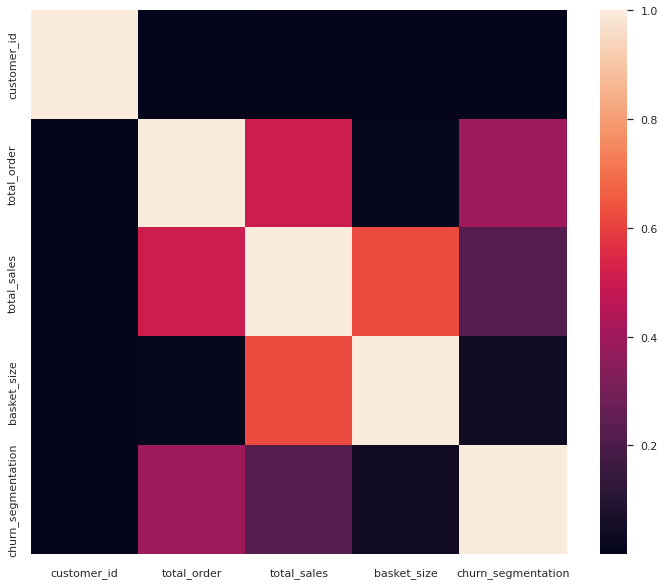

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(segment_fix_brunei.corr())

#Base Modeling

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = segment_fix_brunei[['basket_size','total_order','total_sales']]
y = segment_fix_brunei['segementation_churn']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
len(x_train)

40193

##Logistic Regression

In [ ]:
#Pemodelan Logistic Regression
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()

In [ ]:
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
clf.predict(x_test)

array(['Churn Customer', 'Churn Customer', 'Churn Customer', ...,
       'Churn Customer', 'Churn Customer', 'Churn Customer'], dtype=object)

In [ ]:
y_test

15102        Churn Customer
15812        Churn Customer
37260        Churn Customer
38547        Churn Customer
8069         Churn Customer
                ...        
48929        Churn Customer
18000        Churn Customer
35367    Non-Churn Customer
31869        Churn Customer
24370    Non-Churn Customer
Name: segementation_churn, Length: 10049, dtype: object

In [ ]:
clf.score(x_test,y_test)

0.8213752612200219

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[7796,  271],
       [1524,  458]])

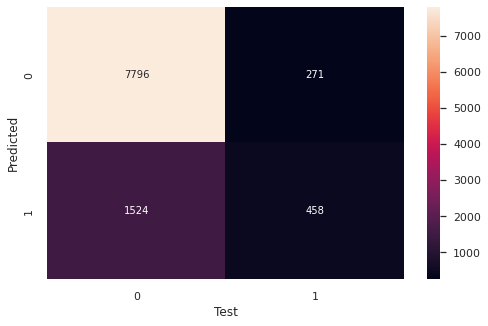

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Test")
plt.ylabel("Predicted")
plt.show()

##Random Forest

In [ ]:
#Pemodelan Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# prediction on test set
y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7680366205592596


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[6882, 1185],
       [1146,  836]])

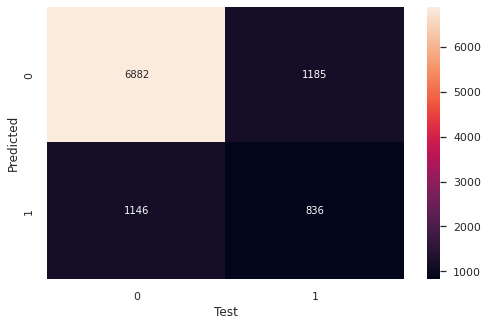

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Test")
plt.ylabel("Predicted")
plt.show()

#Hyperparameter

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
segment_fix_brunei['monetary_segementation'] = LE.fit_transform(segment_fix_brunei['monetary_segementation'])
segment_fix_brunei['first_segmentation'] = LE.fit_transform(segment_fix_brunei['first_segmentation'])
segment_fix_brunei['segementation_churn'] = LE.fit_transform(segment_fix_brunei['segementation_churn'])

<ipython-input-59-8fedb402843d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_fix_brunei['monetary_segementation'] = LE.fit_transform(segment_fix_brunei['monetary_segementation'])
<ipython-input-59-8fedb402843d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_fix_brunei['first_segmentation'] = LE.fit_transform(segment_fix_brunei['first_segmentation'])
<ipython-input-59-8fedb402843d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

##Decision Tree

In [ ]:
x = segment_fix_brunei[['basket_size','total_order','total_sales','monetary_segementation','first_segmentation']]
y = segment_fix_brunei['segementation_churn']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create a Decision Classifier
DTree_clf=DecisionTreeClassifier()

#Train the model using the training sets y_pred=DTree_clf.predict(X_test)
DTree_clf.fit(x_train,y_train)

# prediction on test set
y_pred=DTree_clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7687332072843069


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[7410,  666],
       [1224,  749]])

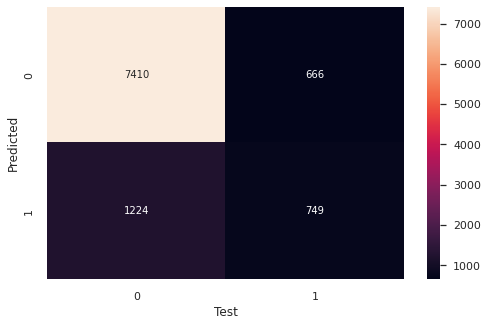

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Test")
plt.ylabel("Predicted")
plt.show()

In [ ]:
#Hyperpamater Tuning Decision Tree
DTree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
#Cek Parameter 
parameters = {'criterion':['gini','entropy','log_loss'],
              'splitter':['best','random']
              } 

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator = DTree_clf, param_grid = parameters, cv=3)

In [ ]:
best_model=grid.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messag

In [ ]:
best_model.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create a Decision Classifier
DTree_clf=DecisionTreeClassifier(criterion = 'entropy', splitter = 'best')

#Train the model using the training sets y_pred=DTree_clf.predict(X_test)
DTree_clf.fit(x_train,y_train)

# prediction on test set
y_pred=DTree_clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7689322320628919


In [ ]:
#Support Vector Classifier
#from sklearn.svm import SVC
#SVC_clf = SVC()
#SVC_clf.fit(x_train, y_train)
#SVC_pred = SVC_clf.predict(x_test)
#print("Accuracy:",metrics.accuracy_score(y_test, SVC_pred))

##Logistic Regression

In [ ]:
#Logistic Regression
LogReg_clf = LogisticRegression()
LogReg_clf.fit(x_train, y_train)
LogReg_pred = LogReg_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, LogReg_pred))

Accuracy: 0.8298338143098816


In [ ]:
#Hyperpamater Tuning Logistic Regression
LogReg_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameters = { 'C': [1.0,2.0,3.0],  #1.0
    #          'class_weight': ['balanced',None],  #None
  #            'dual': [True,False],  #True
  #            'fit_intercept': [True,False], #1
  #            'intercept_scaling': [1,2,3],  #1
  #            'l1_ratio': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],  #0
  #            'max_iter': [100],  #100
  #            'multi_class': ['auto','ovr','multinomial'],  #'auto'
  #            'n_jobs': [None,-1],  #None 
  #            'penalty': ['l1','l2','elasticnet','none'],  #'l2'
  #            'random_state': [0,5,10,15,20,25,30,35,40,42],  #0
  #            'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],  #'saga'
  #            'tol': [0.0001,0.0002,0.0003,0.0004,0.0005],  
  #            'verbose': [1,2,3,4,5],  #1
  #            'warm_start': [True,False]  #True
  }

In [ ]:
from sklearn.model_selection import GridSearchCV
Grid_LR = GridSearchCV(estimator = LogReg_clf, param_grid = parameters,cv=3)

In [ ]:
best_model_logistic = Grid_LR.fit(x_train, y_train)


In [ ]:
best_model_logistic.best_params_

{'C': 1.0}

In [ ]:
best_LR_model = best_model_logistic.best_params_

In [ ]:
#Logistic Regression
LogReg_clf = LogisticRegression(C=1,class_weight=None,solver='saga',fit_intercept=1,intercept_scaling=1,l1_ratio=0,max_iter=100,multi_class='auto',n_jobs=None,random_state=0,verbose=1)
LogReg_clf.fit(x_train, y_train)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
LogReg_pred = LogReg_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, LogReg_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds
Accuracy: 0.8310279629813911


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


In [ ]:
#segmentation_fixing.astype({"segementation_churn":'float'})

In [ ]:
imb_logreg = roc_auc_score(y_test, LogReg_pred)
imb_logreg

0.6233134437240538

In [ ]:
def cross_validation(model,xtrain,ytrain, scoretype, folds):
    scores = cross_val_score(estimator = model,X= xtrain, y = ytrain,scoring = scoretype,cv = folds)
    print("%s: %0.3f (+/- %0.2f)" % ("roc-auc",scores.mean(),scores.std()))

def roc_curve(x_test, y_test, model, model_name):
  y_pred_proba = model.predict_proba(x_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  #create ROC curve
  plt.figure(figsize=(8,8))
  plt.title(model_name, fontsize=16)
  plt.plot(fpr,tpr,label="Model:" + model_name+"(AUC="+str(auc)+")")
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 0 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds
roc-auc: 0.697 (+/- 0.01)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


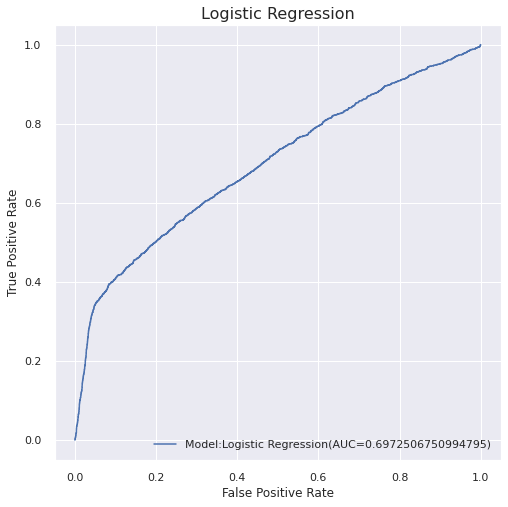

In [ ]:
cross_validation(LogReg_clf,x_train,y_train,scoretype = "roc_auc",folds = 10)
roc_curve(x_test,y_test,LogReg_clf,"Logistic Regression")

In [ ]:
print(x_train.shape) #buat tau bentuknya x_train
print(x_test.shape)  #buat tau bentuknya x_test

(40193, 5)
(10049, 5)


In [ ]:
#Voting Ensemble techniques
#from sklearn.ensemble import VotingClassifier
#from sklearn.metrics import accuracy_score
#voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf)], voting='hard')
#voting_clf.fit(x_train, y_train)
#preds = voting_clf.predict(x_test)
#acc = accuracy_score(y_test, preds)

#print("Accuracy is: " + str(acc))

##K-Nearest Model

In [ ]:
#K-Nearest Model
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8119215842372375


In [ ]:
#Hyperpamater Tuning Random Forest
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
parameters = {"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
 "leaf_size": [0,10,20,30] ,
 #"metric": ['minkowski','precomputed'],
 #"metric_params": [None]
 #"n_jobs": [None],
 #"n_neighbors": [1,2,3,4,5,6,7,8,9,10],
 #"p": [1,2,3,4,5,6,7,8,9,10],
 #"weights": ['uniform','distance']
 }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator = knn_model, param_grid = parameters, cv=3)

SyntaxError: ignored

In [ ]:
best_model=grid.fit(x_train,y_train)

In [ ]:
best_model.best_params_

In [ ]:
#K-Nearest Model
from sklearn.neighbors import KNeighborsClassifier
knn_model_best = KNeighborsClassifier(algorithm = 'auto', leaf_size= 10)
knn_model_best.fit(x_train, y_train)

y_pred = knn_model_best.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8119215842372375


In [ ]:
confusion_matrix(y_test, y_pred) 

array([[7343,  706],
       [1256,  744]])

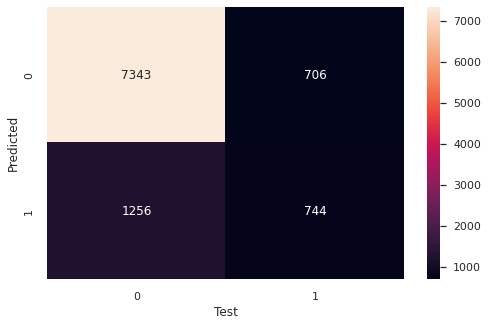

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Test")
plt.ylabel("Predicted")
plt.show()

##Random Forest

In [ ]:
#Pemodelan Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_forest=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(x_test)
clf_forest.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# prediction on test set
y_pred=clf_forest.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7750024878097324


In [ ]:
#Hyperpamater Tuning Random Forest
clf_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameters = {#'bootstrap': [True,False], #True
              #'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], #0.1
#              'class_weight': ['balanced', 'balanced_subsample', None], #balanced_subsample
#              'criterion': ['gini', 'entropy', 'log_loss'], #gini
#              'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], #4
#              'max_features': ['sqrt', 'log2', None], #log2
#              'max_leaf_nodes': ['balanced', 'balanced_subsample',None], #None
#              'max_samples': [1,2,3,4,5,6,7,8,9,10,None], #10
#              'min_impurity_decrease': [0.0,0.1,0.2,0.3,0.4,0.5,0.6], #0.0
#              'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10], #10
#              'min_samples_split': [1,2,3,4,5,6,7,8,9,10], #7
#              'min_weight_fraction_leaf': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], #0.1
#              'n_estimators': 100,
              'n_jobs': [1,2,3,4,5,6,7,8,9,10,None],
              'oob_score': [True,False],
              'random_state': [1,2,3,4,5,6,7,8,9,10,None],
#              'verbose': [0,1,2,3,4,5,6,7,8,9,10],
#              'warm_start': [True,False]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = clf_forest, param_grid = parameters, cv=3)

In [ ]:
best_model_forest = grid.fit(x_train, y_train)

In [ ]:
best_model_forest.best_params_

In [ ]:
clf_forest_best=RandomForestClassifier(bootstrap = True, ccp_alpha = 0.1, class_weight = 'balanced_subsample', criterion = 'gini', max_depth = 4, max_features = 'log2', max_leaf_nodes = None, max_samples = 10, min_impurity_decrease = 0.0, min_samples_leaf = 10, min_samples_split = 7, min_weight_fraction_leaf = 0.1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_forest_best.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.1, class_weight='balanced_subsample',
                       max_depth=4, max_features='log2', max_samples=10,
                       min_samples_leaf=10, min_samples_split=7,
                       min_weight_fraction_leaf=0.1)

In [ ]:
# prediction on test set
y_pred=clf_forest_best.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8036620559259627


#ROC AUC LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    #print (best_parameters)
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': (1, 5, 10), 'penalty': ('l1', 'l2')})

In [ ]:
print_grid_search_metrics(Grid_LR)

Best score: 0.825
Best parameters set:
	C: 1
	penalty: 'l2'


In [ ]:
best_LR_model = Grid_LR.best_estimator_
print (best_LR_model)

LogisticRegression(C=1)


In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_lr = best_LR_model.predict_proba(x_test)[:, 1]
print (best_LR_model.predict_proba(x_test))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

[[0.74705254 0.25294746]
 [0.75678907 0.24321093]
 [0.76884998 0.23115002]
 ...
 [0.89934708 0.10065292]
 [0.71409195 0.28590805]
 [0.63752264 0.36247736]]


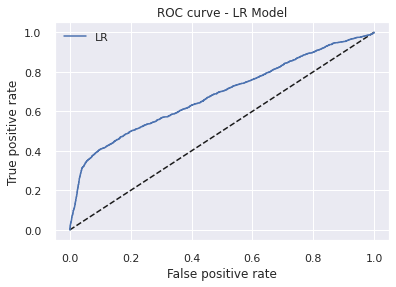

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [ ]:
metrics.auc(fpr_lr,tpr_lr)

0.6828448627907329

#Modelling Started

In [ ]:
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     segementation_churn   No. Observations:                40193
Model:                             GLM   Df Residuals:                    40187
Model Family:                 Binomial   Df Model:                            5
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -15192.
Date:                 Tue, 06 Dec 2022   Deviance:                       30384.
Time:                         04:42:01   Pearson chi2:                 5.51e+04
No. Iterations:                      8                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.2396      0.055    -22.479      0.000      -1.348      -1.131
basket_size             2.552e-07   5.23e-08      4.882      0.000    1.53e-07    3.58e-07
total_order                0.0198      0.002     10.185      0.000       0.016       0.024
total_sales             3.851e-09   3.42e-09      1.127      0.260   -2.85e-09    1.05e-08
monetary_segementation    -0.1122      0.028     -4.052      0.000      -0.166      -0.058
first_segmentation        -1.4449      0.040    -36.507      0.000      -1.522      -1.367
==========================================================================================
"""

#Feature Selection

In [ ]:
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(LogReg_clf, step = 15)
rfe = rfe.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


In [ ]:
rfe.support_

array([ True, False,  True, False, False])

In [ ]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('basket_size', True, 1),
 ('total_order', False, 2),
 ('total_sales', True, 1),
 ('monetary_segementation', False, 2),
 ('first_segmentation', False, 2)]

In [ ]:
# col = X_train.columns[rfe.support_]
col = x_train.columns

In [ ]:
x_train.columns[~rfe.support_]

Index(['total_order', 'monetary_segementation', 'first_segmentation'], dtype='object')

In [ ]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     segementation_churn   No. Observations:                40193
Model:                             GLM   Df Residuals:                    40187
Model Family:                 Binomial   Df Model:                            5
Link Function:                   logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -15192.
Date:                 Tue, 06 Dec 2022   Deviance:                       30384.
Time:                         04:42:10   Pearson chi2:                 5.51e+04
No. Iterations:                      8                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.2396      0.055    -22.479      0.000      -1.348      -1.131
basket_size             2.552e-07   5.23e-08      4.882      0.000    1.53e-07    3.58e-07
total_order                0.0198      0.002     10.185      0.000       0.016       0.024
total_sales             3.851e-09   3.42e-09      1.127      0.260   -2.85e-09    1.05e-08
monetary_segementation    -0.1122      0.028     -4.052      0.000      -0.166      -0.058
first_segmentation        -1.4449      0.040    -36.507      0.000      -1.522      -1.367
==========================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

4167     0.672330
35280    0.280051
23420    0.428756
43326    0.000853
14850    0.064144
20920    0.394259
38875    0.722532
12512    0.265023
4231     0.251316
34878    0.003872
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.67233   , 0.28005072, 0.42875599, 0.00085324, 0.0641436 ,
       0.39425858, 0.72253183, 0.26502311, 0.2513155 , 0.00387224])

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['customer_id'] = y_train.index
y_train_pred_final

,Churn,Churn_Prob,customer_id
0,1,0.672330,4167
1,0,0.280051,35280
2,0,0.428756,23420
3,0,0.000853,43326
4,0,0.064144,14850
...,...,...,...
40188,0,0.003532,356
40189,1,0.014865,26323
40190,0,0.063926,9960
40191,0,0.004446,3913


In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final

,Churn,Churn_Prob,customer_id,predicted
0,1,0.672330,4167,1
1,0,0.280051,35280,0
2,0,0.428756,23420,1
3,0,0.000853,43326,0
4,0,0.064144,14850,0
...,...,...,...,...
40188,0,0.003532,356,0
40189,1,0.014865,26323,0
40190,0,0.063926,9960,0
40191,0,0.004446,3913,0


In [ ]:
group_predicted=y_train_pred_final.groupby('predicted')['customer_id'].nunique().reset_index()
group_predicted

,predicted,customer_id
0,0,31709
1,1,8484


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8182519344164406


In [ ]:
predictions = pd.DataFrame()
predictions['true'] = y_train
predictions['preds'] = LogReg_clf.predict(x_train)

In [ ]:
predictions_test = pd.DataFrame()
predictions_test['true'] = y_test
predictions_test['preds'] = LogReg_clf.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
train_acc = accuracy_score(predictions.true, predictions.preds)
test_acc = accuracy_score(predictions_test.true, predictions_test.preds)

print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")


Train Acc: 0.8271, Test Acc: 0.8302


In [ ]:
print(classification_report(predictions.true, predictions.preds))


              precision    recall  f1-score   support

           0       0.84      0.96      0.90     32178
           1       0.66      0.28      0.39      8015

    accuracy                           0.83     40193
   macro avg       0.75      0.62      0.65     40193
weighted avg       0.81      0.83      0.80     40193



In [ ]:
print(classification_report(predictions_test.true, predictions_test.preds))


              precision    recall  f1-score   support

           0       0.85      0.97      0.90      8090
           1       0.65      0.27      0.39      1959

    accuracy                           0.83     10049
   macro avg       0.75      0.62      0.64     10049
weighted avg       0.81      0.83      0.80     10049



In [ ]:
probs = LogReg_clf.predict_proba(x_test)[:, 1]
probs


array([0.48176104, 0.48832089, 0.49637414, ..., 0.50384215, 0.49311292,
       0.48972005])

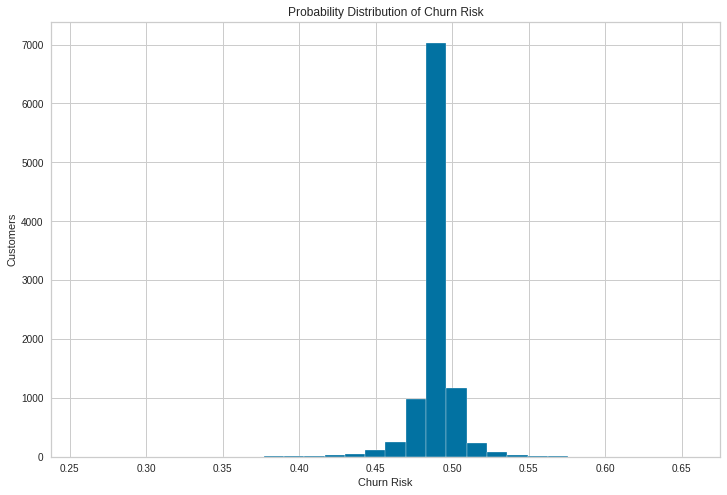

In [ ]:
from matplotlib.pyplot import figure
plt.figure(figsize=(12, 8))

plt.hist(probs, bins = int(180/6))
plt.title('Probability Distribution of Churn Risk')
plt.xlabel('Churn Risk')
plt.ylabel('Customers')
plt.show()

#INSIGHT PREDICTION CHURN

In [ ]:
segment_fix_brunei

,customer_id,full_name,total_order,total_sales,basket_size,monetary_segementation,first_segmentation,churn_segmentation,segementation_churn
0,3,Ganep Mustofa,2,374515,187257,Low Spender,Defecting,0.0,Churn Customer
1,18,Kamaria Hasanah,7,2025456,289350,Low Spender,Active,1.0,Non-Churn Customer
2,27,Indra Dabukke,2,629486,314743,Normal,Inactive,0.0,Churn Customer
3,67,Ina Nuraini,1,439582,439582,Normal,Inactive,0.0,Churn Customer
4,68,Atmaja Hidayanto,6,1742337,290389,Low Spender,Active,0.0,Churn Customer
...,...,...,...,...,...,...,...,...,...
12755,99959,Nadia Hariyah,1,4980670,4980670,Gold,Defecting,0.0,Churn Customer
12756,99967,Dalima Wahyuni,1,375135,375135,Normal,Defecting,0.0,Churn Customer
12757,99978,Nasim Prabowo,1,323200,323200,Normal,First Timer,0.0,Churn Customer
12758,99991,Elisa Wulandari,1,148328,148328,Low Spender,First Timer,0.0,Churn Customer


In [ ]:
data_1=segment_fix_brunei.merge(y_train_pred_final, on='customer_id', how='inner')
data_1

NameError: ignored

In [ ]:
data_1 = data_1.reset_index(drop=False)
data_1.drop(columns='churn_segmentation', inplace=True)
#data_1.info()

In [ ]:
data_1 = data_1.reset_index(drop=False)
data_1.drop(columns='segementation_churn', inplace=True)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20250 entries, 0 to 20249
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   level_0                 20250 non-null  int64  
 1   index                   20250 non-null  int64  
 2   customer_id             20250 non-null  int64  
 3   full_name               20250 non-null  object 
 4   total_order             20250 non-null  int64  
 5   total_sales             20250 non-null  int64  
 6   basket_size             20250 non-null  int64  
 7   monetary_segementation  20250 non-null  object 
 8   first_segmentation      19558 non-null  object 
 9   Churn                   20250 non-null  int64  
 10  Churn_Prob              20250 non-null  float64
 11  predicted               20250 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 1.9+ MB


In [ ]:
data_1

,level_0,index,customer_id,full_name,total_order,total_sales,basket_size,monetary_segementation,first_segmentation,Churn,Churn_Prob,predicted
0,0,0,3,Ganep Mustofa,49,20891374,426354,Normal,Active,0,0.013784,0
1,1,1,8,Nilam Fujiati,7,3898561,556937,Normal,Active,0,0.000639,0
2,2,2,9,Hesti Purwanti,6,2638665,439777,Normal,Active,0,0.271161,0
3,3,3,11,Luwar Permadi,1,197533,197533,Low Spender,First Timer,0,0.223321,0
4,4,4,15,Tari Hassanah,5,2134870,426974,Normal,Defecting,0,0.003050,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20274,20274,20274,50226,Asirwada Ardianto,3,782227,260742,Low Spender,Active,0,0.003098,0
20275,20275,20275,50228,Alika Rahmawati,109,60090694,551290,Normal,Active,0,0.256577,0
20276,20276,20276,50231,Michelle Handayani,39,17060352,437444,Normal,Active,0,0.252917,0
20277,20277,20277,50235,Danu Pradipta,1,242617,242617,Low Spender,Inactive,0,0.231469,0


In [ ]:
#Pilih Kolom yang akan digunakan saja
transaction_1 = merge_transaction[['created_at',
                             'customer_id',
                             'payment_method',
                             'promo_code',
                             'product_id',
                             'session_id'
 ]]
transaction_1

,created_at,customer_id,payment_method,promo_code,product_id,session_id
0,2018-07-29T15:22:01.458193Z,5868,Debit Card,WEEKENDSERU,54728,3abaa6ce-e320-4e51-9469-d9f3fa328e86
1,2018-07-30T12:40:22.365620Z,4774,Credit Card,NaN,16193,2ee5ead1-f13e-4759-92df-7ff48475e970
2,2018-09-15T11:51:17.365620Z,4774,OVO,NaN,53686,93325fb6-eb00-4268-bb0e-6471795a0ad0
3,2018-11-01T11:23:48.365620Z,4774,Credit Card,NaN,20228,bcad5a61-1b67-448d-8ff4-781d67bc56e4
4,2018-12-18T11:20:30.365620Z,4774,Credit Card,NaN,55220,df1042ab-13e6-4072-b9d2-64a81974c51a
...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,Debit Card,NaN,30642,484eecde-9f4a-42de-a8df-7ce6668101f4
1254581,2021-12-09T07:35:18.222046Z,34829,OVO,AZ2022,19394,954e1211-4d45-4d0b-ba84-53e80119592c
1254582,2021-12-11T01:20:36.944593Z,99645,Credit Card,WEEKENDSERU,13079,e6e6c108-abd0-49a2-b0a5-691117f9cfe1
1254583,2019-12-18T11:01:09.623382Z,87319,Credit Card,AZ2022,11312,bb6e5426-a3f3-426a-b99d-79173eaa234b


In [ ]:
transaction_1.loc[(transaction_1['promo_code'] != 'AZ2022')&
                     (transaction_1['promo_code'] != 'BUYMORE')&
                     (transaction_1['promo_code'] != 'LIBURDONG')&
                     (transaction_1['promo_code'] != 'SC2022')&
                     (transaction_1['promo_code'] != 'STARTUP')&
                     (transaction_1['promo_code'] != 'WEEKENDMANTAP')&
                     (transaction_1['promo_code'] != 'WEEKENDSERU')&
                     (transaction_1['promo_code'] != 'XX2022'), 'promo_code'] = 'Tidak menggunakan kode promo'

transaction_1


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,created_at,customer_id,payment_method,promo_code,product_id,session_id
0,2018-07-29T15:22:01.458193Z,5868,Debit Card,WEEKENDSERU,54728,3abaa6ce-e320-4e51-9469-d9f3fa328e86
1,2018-07-30T12:40:22.365620Z,4774,Credit Card,Tidak menggunakan kode promo,16193,2ee5ead1-f13e-4759-92df-7ff48475e970
2,2018-09-15T11:51:17.365620Z,4774,OVO,Tidak menggunakan kode promo,53686,93325fb6-eb00-4268-bb0e-6471795a0ad0
3,2018-11-01T11:23:48.365620Z,4774,Credit Card,Tidak menggunakan kode promo,20228,bcad5a61-1b67-448d-8ff4-781d67bc56e4
4,2018-12-18T11:20:30.365620Z,4774,Credit Card,Tidak menggunakan kode promo,55220,df1042ab-13e6-4072-b9d2-64a81974c51a
...,...,...,...,...,...,...
1254580,2021-09-21T22:10:05.074873Z,25121,Debit Card,Tidak menggunakan kode promo,30642,484eecde-9f4a-42de-a8df-7ce6668101f4
1254581,2021-12-09T07:35:18.222046Z,34829,OVO,AZ2022,19394,954e1211-4d45-4d0b-ba84-53e80119592c
1254582,2021-12-11T01:20:36.944593Z,99645,Credit Card,WEEKENDSERU,13079,e6e6c108-abd0-49a2-b0a5-691117f9cfe1
1254583,2019-12-18T11:01:09.623382Z,87319,Credit Card,AZ2022,11312,bb6e5426-a3f3-426a-b99d-79173eaa234b


In [ ]:
transaction_1['created_at'] = pd.to_datetime(transaction_1['created_at']).dt.date
transaction_1

<ipython-input-86-2c6b561a1162>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_1['created_at'] = pd.to_datetime(transaction_1['created_at']).dt.date


,created_at,customer_id,payment_method,promo_code,product_id,session_id
0,2018-07-29,5868,Debit Card,WEEKENDSERU,54728,3abaa6ce-e320-4e51-9469-d9f3fa328e86
1,2018-07-30,4774,Credit Card,Tidak menggunakan kode promo,16193,2ee5ead1-f13e-4759-92df-7ff48475e970
2,2018-09-15,4774,OVO,Tidak menggunakan kode promo,53686,93325fb6-eb00-4268-bb0e-6471795a0ad0
3,2018-11-01,4774,Credit Card,Tidak menggunakan kode promo,20228,bcad5a61-1b67-448d-8ff4-781d67bc56e4
4,2018-12-18,4774,Credit Card,Tidak menggunakan kode promo,55220,df1042ab-13e6-4072-b9d2-64a81974c51a
...,...,...,...,...,...,...
1254580,2021-09-21,25121,Debit Card,Tidak menggunakan kode promo,30642,484eecde-9f4a-42de-a8df-7ce6668101f4
1254581,2021-12-09,34829,OVO,AZ2022,19394,954e1211-4d45-4d0b-ba84-53e80119592c
1254582,2021-12-11,99645,Credit Card,WEEKENDSERU,13079,e6e6c108-abd0-49a2-b0a5-691117f9cfe1
1254583,2019-12-18,87319,Credit Card,AZ2022,11312,bb6e5426-a3f3-426a-b99d-79173eaa234b


In [ ]:
click_stream = click_stream[['session_id',
                             'event_name']]
#click_stream


In [ ]:
customer_1 = customer[['customer_id',
                          'birthdate',
                          'first_join_date']]
#customer_1

In [ ]:
product.rename(columns={"id":"product_id"},inplace=True)

In [ ]:
#Menggabungkan dataset
#by Meliana
data_akhir1 =customer_1.merge(transaction_1, on='customer_id').merge(product, on='product_id')


In [ ]:
data_akhir=data_akhir1.merge(data_1, on='customer_id', how='inner')
data_akhir

,customer_id,full_name,total_order,total_sales,basket_size,monetary_segementation,first_segmentation,churn_segmentation,segementation_churn,Churn,Churn_Prob,predicted,birthdate,first_join_date,created_at,payment_method,promo_code,product_id,session_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,3,Ganep Mustofa,49,20891374,426354,Normal,Active,0.0,Churn Customer,0,0.014222,0,1986-07-12,2018-08-25,2021-05-02,Gopay,LIBURDONG,54551,e8f039b6-0e87-44e7-82ba-448ebfda49fd,Women,Apparel,Topwear,Tunics,Blue,Summer,2012.0,Casual,Global Desi Women Blue Tunic
1,3,Ganep Mustofa,49,20891374,426354,Normal,Active,0.0,Churn Customer,0,0.014222,0,1986-07-12,2018-08-25,2018-12-15,Credit Card,LIBURDONG,59272,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Women,Accessories,Watches,Watches,Pink,Winter,2016.0,Casual,Titan Women Pink Watch
2,3,Ganep Mustofa,49,20891374,426354,Normal,Active,0.0,Churn Customer,0,0.014222,0,1986-07-12,2018-08-25,2020-05-03,Gopay,Tidak menggunakan kode promo,34617,71b5c6ae-33cc-4290-8a21-3a01fddca194,Men,Apparel,Innerwear,Briefs,Black,Summer,2016.0,Casual,Hanes Men ComfortSoft Pack of 2 Waistband Hip ...
3,3,Ganep Mustofa,49,20891374,426354,Normal,Active,0.0,Churn Customer,0,0.014222,0,1986-07-12,2018-08-25,2021-02-07,Credit Card,Tidak menggunakan kode promo,55876,4942c7d5-2921-454a-a926-e48788f571fa,Women,Personal Care,Nails,Nail Polish,Black,Spring,2017.0,Casual,Colorbar Exclusive Nail Lacquer 76
4,3,Ganep Mustofa,49,20891374,426354,Normal,Active,0.0,Churn Customer,0,0.014222,0,1986-07-12,2018-08-25,2022-03-06,Credit Card,Tidak menggunakan kode promo,30213,fa841e98-0b8a-413d-ba51-d6e8f66a7483,Men,Apparel,Topwear,Shirts,Grey,Summer,2012.0,Formal,John Miller Men Grey Shirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506930,50236,Kezia Nasyiah,3,1759253,586417,Normal,Inactive,0.0,Churn Customer,0,0.056542,0,1996-01-08,2017-05-13,2020-11-04,Gopay,Tidak menggunakan kode promo,58052,6cec32c7-2302-4b72-9edc-162009e02c88,Women,Accessories,Jewellery,Earrings,Pink,Fall,2012.0,Casual,Rreverie Pink & Purple Earrings
506931,50236,Kezia Nasyiah,3,1759253,586417,Normal,Inactive,0.0,Churn Customer,0,0.056542,0,1996-01-08,2017-05-13,2020-11-04,Gopay,Tidak menggunakan kode promo,29095,6cec32c7-2302-4b72-9edc-162009e02c88,Women,Accessories,Eyewear,Sunglasses,Brown,Winter,2016.0,Casual,M Tv Women Brown Sunglasses
506932,50236,Kezia Nasyiah,3,1759253,586417,Normal,Inactive,0.0,Churn Customer,0,0.056542,0,1996-01-08,2017-05-13,2020-11-04,Gopay,Tidak menggunakan kode promo,35898,6cec32c7-2302-4b72-9edc-162009e02c88,Women,Accessories,Bags,Handbags,Purple,Summer,2012.0,Casual,Peperone Women Purple Handbag
506933,50236,Kezia Nasyiah,3,1759253,586417,Normal,Inactive,0.0,Churn Customer,0,0.056542,0,1996-01-08,2017-05-13,2019-02-08,Gopay,Tidak menggunakan kode promo,34103,59b69658-a0bb-4af1-b603-bbdd6c8f760d,Boys,Apparel,Topwear,Tshirts,Green,Summer,2012.0,Casual,Doodle Boys Printed Green T-shirt


In [ ]:
data_akhir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506935 entries, 0 to 506934
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             506935 non-null  int64  
 1   birthdate               506935 non-null  object 
 2   home_location           506935 non-null  object 
 3   first_join_date         506935 non-null  object 
 4   created_at              506935 non-null  object 
 5   payment_method          506935 non-null  object 
 6   promo_code              506935 non-null  object 
 7   product_id              506935 non-null  int64  
 8   session_id              506935 non-null  object 
 9   gender                  506935 non-null  object 
 10  masterCategory          506935 non-null  object 
 11  subCategory             506935 non-null  object 
 12  articleType             506935 non-null  object 
 13  baseColour              506764 non-null  object 
 14  season              

In [ ]:
data_akhir.drop(columns='product_id', inplace=True)

KeyError: ignored

In [ ]:
data_akhir.drop(columns='session_id', inplace=True)
data_akhir.drop(columns='gender', inplace=True)
data_akhir.drop(columns='masterCategory', inplace=True)
data_akhir.drop(columns='articleType', inplace=True)
data_akhir.drop(columns='baseColour', inplace=True)
data_akhir.drop(columns='season', inplace=True)
data_akhir.drop(columns='year', inplace=True)
data_akhir.drop(columns='usage', inplace=True)
data_akhir.drop(columns='productDisplayName', inplace=True)
data_akhir.drop(columns='level_0', inplace=True)
data_akhir.drop(columns='index', inplace=True)

In [ ]:
data_akhir

,customer_id,birthdate,home_location,first_join_date,created_at,payment_method,promo_code,subCategory,full_name,total_order,total_sales,basket_size,monetary_segementation,first_segmentation,Churn,Churn_Prob,predicted
0,7279,1989-01-23,Nusa Tenggara Barat,2020-08-23,2020-08-23,LinkAja,WEEKENDSERU,Belts,Bakiman Simanjuntak,79,45600224,577218,Normal,Active,1,0.262040,0
1,7279,1989-01-23,Nusa Tenggara Barat,2020-08-23,2020-08-23,LinkAja,WEEKENDSERU,Topwear,Bakiman Simanjuntak,79,45600224,577218,Normal,Active,1,0.262040,0
2,7279,1989-01-23,Nusa Tenggara Barat,2020-08-23,2020-08-31,LinkAja,Tidak menggunakan kode promo,Shoe Accessories,Bakiman Simanjuntak,79,45600224,577218,Normal,Active,1,0.262040,0
3,7279,1989-01-23,Nusa Tenggara Barat,2020-08-23,2020-09-08,LinkAja,Tidak menggunakan kode promo,Topwear,Bakiman Simanjuntak,79,45600224,577218,Normal,Active,1,0.262040,0
4,7279,1989-01-23,Nusa Tenggara Barat,2020-08-23,2020-09-16,Debit Card,Tidak menggunakan kode promo,Bags,Bakiman Simanjuntak,79,45600224,577218,Normal,Active,1,0.262040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506930,11241,1994-06-30,Papua Barat,2021-06-05,2021-06-06,Debit Card,Tidak menggunakan kode promo,Eyewear,Kasusra Hidayanto,1,682896,682896,Normal,Inactive,0,0.014350,0
506931,34888,1991-02-05,Jawa Timur,2022-02-07,2022-02-07,Gopay,Tidak menggunakan kode promo,Topwear,Carla Puspasari,1,1544056,1544056,Silver,First Timer,0,0.320770,1
506932,35805,1994-04-17,Jawa Barat,2021-12-18,2021-12-18,Credit Card,Tidak menggunakan kode promo,Watches,Kawaya Najmudin,1,337106,337106,Normal,NaN,1,0.232093,0
506933,39356,1998-02-28,Maluku,2021-10-16,2021-10-16,OVO,Tidak menggunakan kode promo,Shoes,Shakila Uyainah,1,147718,147718,Low Spender,NaN,0,0.216390,0


In [ ]:
#Menggabungkan dataset
#by Meliana
data_akhir2 =customer_1.merge(transaction_1, on='customer_id').merge(product, on='product_id')
data_akhirr=data_akhir1.merge(data_1,on='customer_id')

In [ ]:
data_click=transaction_1.merge(y_train_pred_final, on='customer_id').merge(click_stream, on='session_id')
data_click

,created_at,customer_id,payment_method,promo_code,product_id,session_id,Churn,Churn_Prob,predicted,event_name,event_time,event_id,traffic_source,event_metadata
0,2018-07-29,5868,Debit Card,WEEKENDSERU,54728,3abaa6ce-e320-4e51-9469-d9f3fa328e86,1,0.313317,1,HOMEPAGE,2018-07-29T14:41:48.913621Z,bf5bc15f-187d-4fae-ab0f-eb962cb77b24,WEB,NaN
1,2018-07-29,5868,Debit Card,WEEKENDSERU,54728,3abaa6ce-e320-4e51-9469-d9f3fa328e86,1,0.313317,1,ADD_TO_CART,2018-07-29T14:43:45.913621Z,a72f9625-6538-4f03-8d62-7c366a3084e8,WEB,"{'product_id': 54728, 'quantity': 1, 'item_pri..."
2,2018-07-29,5868,Debit Card,WEEKENDSERU,54728,3abaa6ce-e320-4e51-9469-d9f3fa328e86,1,0.313317,1,ADD_PROMO,2018-07-29T14:45:20.913621Z,cab2c88b-0a6d-477c-b119-12864d9597eb,WEB,"{'promo_code': 'WEEKENDSERU', 'promo_amount': ..."
3,2018-07-29,5868,Debit Card,WEEKENDSERU,54728,3abaa6ce-e320-4e51-9469-d9f3fa328e86,1,0.313317,1,BOOKING,2018-07-29T15:22:01.458193Z,74a81855-2725-42f8-968d-9a142316745d,WEB,{'payment_status': 'Success'}
4,2018-07-29,5868,Debit Card,WEEKENDSERU,54728,3abaa6ce-e320-4e51-9469-d9f3fa328e86,1,0.313317,1,CLICK,2018-07-29T14:43:19.913621Z,7704e6b7-b6fd-4f72-93ef-98dd05114ee3,WEB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438413,2021-09-21,25121,Debit Card,Tidak menggunakan kode promo,30642,484eecde-9f4a-42de-a8df-7ce6668101f4,0,0.293199,0,HOMEPAGE,2021-08-03T14:30:33.074873Z,3841ec83-6049-45ca-a09c-d3ba9106ff68,MOBILE,NaN
8438414,2021-09-21,25121,Debit Card,Tidak menggunakan kode promo,30642,484eecde-9f4a-42de-a8df-7ce6668101f4,0,0.293199,0,ADD_TO_CART,2021-08-15T22:51:50.074873Z,a352c4a3-d670-47d3-b595-1e1ebe1ea06f,MOBILE,"{'product_id': 30642, 'quantity': 2, 'item_pri..."
8438415,2021-09-21,25121,Debit Card,Tidak menggunakan kode promo,30642,484eecde-9f4a-42de-a8df-7ce6668101f4,0,0.293199,0,BOOKING,2021-09-21T22:10:05.074873Z,5b2b6d61-7001-46e7-a868-12bf8d2c0dd7,MOBILE,{'payment_status': 'Failed'}
8438416,2021-09-21,25121,Debit Card,Tidak menggunakan kode promo,30642,484eecde-9f4a-42de-a8df-7ce6668101f4,0,0.293199,0,ADD_TO_CART,2021-08-15T22:48:13.074873Z,c0f1bfd8-5528-4a9c-9e47-67a45c104fb3,MOBILE,"{'product_id': 47109, 'quantity': 1, 'item_pri..."


##Event Name Total Session Id

In [ ]:
click_sess = click_stream.groupby('event_name').agg(
    total = ('session_id','nunique')
).reset_index()
click_sess.sort_values(by='total',ascending=False)

,event_name,total
4,HOMEPAGE,895203
1,ADD_TO_CART,872061
2,BOOKING,852582
3,CLICK,671476
7,SCROLL,572486
5,ITEM_DETAIL,520780
8,SEARCH,490846
6,PROMO_PAGE,351079
0,ADD_PROMO,326535


In [ ]:
cd ~

/root


In [ ]:
from google.colab import files
Jumlah_churn_event.to_csv('dataclick.csv') 
files.download('dataclick.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Jumlah_Churn_Event

In [ ]:
#Churn = 0, non-churn = 1
Jumlah_churn_event = data_click.groupby(['event_name','Churn'])['customer_id'].nunique().reset_index()
Jumlah_churn_event

,event_name,Churn,customer_id
0,ADD_PROMO,0,12525
1,ADD_PROMO,1,3145
2,ADD_TO_CART,0,16423
3,ADD_TO_CART,1,4071
4,BOOKING,0,16423
5,BOOKING,1,4071
6,CLICK,0,15153
7,CLICK,1,3762
8,HOMEPAGE,0,16423
9,HOMEPAGE,1,4071


In [ ]:
Jumlah_churn_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   event_name   18 non-null     object
 1   Churn        18 non-null     int64 
 2   customer_id  18 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [ ]:
from matplotlib.pyplot import figure
plt.figure(figsize=(12, 8))

plt.hist(probs, bins = int(180/6))
plt.title('Probability Distribution of Churn Risk')
plt.xlabel('Churn Risk')
plt.ylabel('Customers')
plt.show()

#Insight untuk monetary_segementation

In [ ]:
#Churn = 0, non-churn = 1
Jumlah_order_per_monetary = data_akhir.groupby(['monetary_segementation','Churn'])['total_order'].nunique().reset_index()
Jumlah_order_per_monetary

,monetary_segementation,Churn,total_order
0,Gold,0,16
1,Gold,1,8
2,Low Spender,0,31
3,Low Spender,1,20
4,Normal,0,230
5,Normal,1,160
6,Platinum,0,5
7,Platinum,1,3
8,Silver,0,32
9,Silver,1,23


In [ ]:
total_sales_per_monetary = data_akhir.groupby(['monetary_segementation','Churn'])['total_sales'].nunique().reset_index()
total_sales_per_monetary

,monetary_segementation,Churn,total_sales
0,Gold,0,107
1,Gold,1,26
2,Low Spender,0,3557
3,Low Spender,1,926
4,Normal,0,11406
5,Normal,1,2773
6,Platinum,0,5
7,Platinum,1,3
8,Silver,0,1159
9,Silver,1,295


In [ ]:
jumlah_customer_per_monetary = data_akhir.groupby(['monetary_segementation','Churn'])['customer_id'].nunique().reset_index()
jumlah_customer_per_monetary

,monetary_segementation,Churn,customer_id
0,Gold,0,107
1,Gold,1,26
2,Low Spender,0,3565
3,Low Spender,1,926
4,Normal,0,11416
5,Normal,1,2775
6,Platinum,0,5
7,Platinum,1,3
8,Silver,0,1160
9,Silver,1,296


In [ ]:
basket_size_per_monetary = data_akhir.groupby(['monetary_segementation','Churn'])['basket_size'].nunique().reset_index()
basket_size_per_monetary

,monetary_segementation,Churn,basket_size
0,Gold,0,107
1,Gold,1,26
2,Low Spender,0,3536
3,Low Spender,1,923
4,Normal,0,11284
5,Normal,1,2768
6,Platinum,0,5
7,Platinum,1,3
8,Silver,0,1159
9,Silver,1,295


In [ ]:
frequency = data_akhir.groupby(by="customer_id",as_index=False).agg({"created_at":"nunique"})
frequency.columns = ['customer_id','frequency']
frequency

,order_frequency,Churn,customer_id
0,0.000438,0,1
1,0.000862,0,1
2,0.001080,0,1
3,0.001683,0,1
4,0.007928,0,1
5,0.111486,0,1
6,0.269231,0,1
7,0.457944,0,1
8,5.000000,0,1
9,10.200000,0,1


In [ ]:
cd ~

/root


In [ ]:
from google.colab import files
data_akhir.to_csv('dataakhir.csv') 
files.download('dataakhir.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
data_akhirr.to_csv('dataakhirr.csv') 
files.download('dataakhirr.csv')

In [ ]:
#Mengubah format date ke year
#by Meliana
#customer['first_join_date'] = pd.to_datetime(customer['first_join_date']).dt.year
#customer.head()

In [ ]:
#Melihat Customer yang join 
#customer_join=customer.groupby(['first_join_date']).agg(
#    total_customer =('customer_id','nunique'),
#)
#customer_join

In [ ]:
#churn_peryear = transaction[['created_at',
#                             'customer_id',
#                             'payment_status'
#                           ]]
#churn_peryear.head()

In [ ]:
#As String
#churn_peryear['created_at']= churn_peryear['created_at'].astype('string')

In [ ]:
#tahun_2016= churn_peryear[(churn_peryear.created_at == '2016') & (churn_peryear.payment_status == 'Success')]
#tahun_2017= churn_peryear[(churn_peryear.created_at == '2017') & (churn_peryear.payment_status == 'Success')]
#tahun_2018= churn_peryear[(churn_peryear.created_at == '2018') & (churn_peryear.payment_status == 'Success')]
#tahun_2019= churn_peryear[(churn_peryear.created_at == '2019') & (churn_peryear.payment_status == 'Success')]
#tahun_2020= churn_peryear[(churn_peryear.created_at == '2020') & (churn_peryear.payment_status == 'Success')]
#tahun_2021= churn_peryear[(churn_peryear.created_at == '2021') & (churn_peryear.payment_status == 'Success')]
#tahun_2022= churn_peryear[(churn_peryear.created_at == '2022') & (churn_peryear.payment_status == 'Success')]

In [ ]:
##Merge Year
#churn_calculation = tahun_2016.merge(tahun_2018, on='customer_id', how='inner')
#churn_calculation.head()

In [ ]:
#jumlah_customer_belanja_lagi=churn_calculation.customer_id.nunique()
#jumlah_customer_belanja_lagi

In [ ]:
#Hitung Customer Unique per Year
#jumlah_customer=tahun_2016.customer_id.nunique()
#jumlah_customer

In [ ]:
#Session ID in Transaction and ClickStream
#session_customer = transaction.merge(click_stream, on='session_id', how='inner')

In [ ]:
#session_cont = session_customer[['customer_id',
#                             'session_id',
#                             'event_name',
#                             'payment_status'
#                           ]]
#session_cont.head()

In [ ]:
#summary_session=session_cont.groupby(['event_name']).agg(
#    total_customer =('customer_id','nunique'),
#)
#customer_join

In [ ]:
#Jumlah penjualan produk per bulan 
#by Nadia Ulpa
data1['subCategory'].value_counts() #banyaknya produk per sub category


Perbandingan Order Male & Female

In [ ]:
#by Anam
#order_per_gender=customer.groupby('gender')['customer_id'].nunique().reset_index()
#order_per_gender.sort_values(by='customer_id',ascending=False)

In [ ]:
pembelian = data1.groupby('articleType')['booking_id'].nunique().reset_index()
pembelian.rename(columns={"articleType" : "jenis"}, inplace=True)
pembelian.rename(columns={"booking_id" : "jumlah_total"}, inplace=True)
pembelian.sort_values(by='jumlah_total', ascending=False)

Product terlaris

In [ ]:
#by Anam
#order_per_product=data1.groupby('subCategory')['booking_id'].nunique().reset_index()
#order_per_product.sort_values(by='booking_id',ascending=False)

Rate Promo pertahun

In [ ]:
#by ishlah
#banyak_promo_per_tahun = data1.groupby(['promo_code','created_at']).agg(
 #   jumlah_total_per_tahun=('booking_id','nunique'),)
#banyak_promo_per_tahun.sort_values(by="promo_code", ascending=False)

Total Promo

In [ ]:
#by ishlah
#total_promo = data1.groupby('promo_code')['booking_id'].nunique().reset_index()
#total_promo.rename(columns={"promo_code" : "promo"}, inplace=True)
#total_promo.rename(columns={"booking_id" : "jumlah_total_promo"}, inplace=True)
#total_promo.sort_values(by='jumlah_total_promo', ascending=False)

Cek Info data1

In [ ]:
data1.info()

Jumlah order pertaun

In [ ]:
#banyak_promo_per_tahun = data1.groupby(['created_at']).agg(
#    jumlah_total_order_tahun=('booking_id','nunique'),)
#banyak_promo_per_tahun.sort_values(by="created_at",ascending=False)

Julah order per evice

In [ ]:
#order_per_traffic=data1.groupby('traffic_source')['booking_id'].nunique().reset_index()
#order_per_traffic.sort_values(by='booking_id',ascending=False)

tgl booking sm tgl batas pengiriman

In [ ]:
#order_per_traffic=data1.groupby('shipment_date_limit')['booking_id'].nunique().reset_index()
#order_per_traffic.sort_values(by='booking_id',ascending=False)

In [ ]:
sucsess= transaction[(transaction.payment_status == 'Success')]

In [ ]:
#row_total=sucsess.groupby(['created_at']).agg(
 #   total_order   =('booking_id','unique'),
  #  total_customer =('customer_id','unique'),
   # total_sales   =('total_amount','sum'),
    #total_promo = ('promo_amount','sum')
#)
#row_total

lihat payment method (populernya pake apa) [payment_method, payment_status, created_at]

In [ ]:
#popular_payment = data1.groupby(['created_at', 'payment_method']).agg(
 #   jumlah_total_order_tahun=('payment_status','sum'),)
#opular_payment.sort_values(by="created_at",ascending=False)

In [ ]:
#transaction_data.head()

## Churn User Saat Gagal Melakukan Pemesanan

In [ ]:
customer_transaction=customer.merge(transaction, on='customer_id', how='left')
#customer_transaction.head()

In [ ]:
failed= customer_transaction[(customer_transaction.payment_status != 'Success')]
#sucsess

In [ ]:
first_step = failed[['customer_id','first_name','last_name','first_join_date','created_at']]
#first_step

In [ ]:
# menggabungkan first name dan last name menjadi full name
first_step["full_name"] = first_step['first_name'].astype(str) +" "+ first_step["last_name"]

<ipython-input-8-4eac7576f915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_step["full_name"] = first_step['first_name'].astype(str) +" "+ first_step["last_name"]


In [ ]:
#memilih data yang dibutuhkan untuk data transformation
second_step = first_step[['customer_id',
                          'full_name',
                          'first_join_date',
                          'created_at'
                        ]]
second_step

,customer_id,full_name,first_join_date,created_at
0,2870,Lala Maryati,2019-07-21,NaN
1,8193,Maimunah Laksmiwati,2017-07-16,NaN
6,7279,Bakiman Simanjuntak,2020-08-23,2020-09-24T13:32:03.916342Z
10,7279,Bakiman Simanjuntak,2020-08-23,2020-10-26T14:31:35.916342Z
24,7279,Bakiman Simanjuntak,2020-08-23,2021-02-15T18:28:11.916342Z
...,...,...,...,...
901750,72065,Danu Pradana,2017-11-25,2020-01-14T14:29:04.603013Z
901754,72065,Danu Pradana,2017-11-25,2020-06-18T15:06:12.603013Z
901761,72065,Danu Pradana,2017-11-25,2021-03-18T17:58:39.603013Z
901870,75597,Ajimat Mansur,2020-05-31,NaN


In [ ]:
# menghilangkan waktu pada cretaed at agar lebih mudah diubah menjadi type datetime
second_step['created_at'] = pd.to_datetime(second_step['created_at']).dt.date
#econd_step

<ipython-input-10-b0f159dea178>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_step['created_at'] = pd.to_datetime(second_step['created_at']).dt.date


In [ ]:
# mengubah tipe object menjadi date
second_step['created_at'] =  pd.to_datetime(second_step['created_at'], format='%Y-%m-%d')
second_step['first_join_date'] =  pd.to_datetime(second_step['first_join_date'], format='%Y-%m-%d')

<ipython-input-11-4e4cf182cc6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_step['created_at'] =  pd.to_datetime(second_step['created_at'], format='%Y-%m-%d')
<ipython-input-11-4e4cf182cc6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_step['first_join_date'] =  pd.to_datetime(second_step['first_join_date'], format='%Y-%m-%d')


In [ ]:
# Melakukan pemilihan maxdate pada first_join_date
third_step=second_step[second_step.groupby('customer_id').first_join_date.transform('max') == second_step.first_join_date]
third_step

,customer_id,full_name,first_join_date,created_at
0,2870,Lala Maryati,2019-07-21,NaT
1,8193,Maimunah Laksmiwati,2017-07-16,NaT
6,7279,Bakiman Simanjuntak,2020-08-23,2020-09-24
10,7279,Bakiman Simanjuntak,2020-08-23,2020-10-26
24,7279,Bakiman Simanjuntak,2020-08-23,2021-02-15
...,...,...,...,...
901750,72065,Danu Pradana,2017-11-25,2020-01-14
901754,72065,Danu Pradana,2017-11-25,2020-06-18
901761,72065,Danu Pradana,2017-11-25,2021-03-18
901870,75597,Ajimat Mansur,2020-05-31,NaT


In [ ]:
# Melakukan pemilihan maxdate pada created_at
fourth_step=third_step[second_step.groupby('customer_id').created_at.transform('max') == third_step.created_at]
#fourth_step

In [ ]:
# Variable final_customer_transaction
final_customer_transaction=fourth_step
#final_customer_transaction

In [ ]:
#Melakukan pemilihan data untuk menntukan jumlah order dan jumlah sales
sales_data_join = failed[['customer_id','booking_id','total_amount']]
#sales_data_join

In [ ]:
sales_dataset=sales_data_join.merge(final_customer_transaction, on='customer_id', how='inner')
#sales_dataset.info()

In [ ]:
sales_dataset = sales_dataset.astype({"total_amount":'int'})

In [ ]:
bahan_segment_satu=sales_dataset.groupby(['customer_id','full_name','first_join_date','created_at']).agg(
    total_order   =('booking_id','nunique'),
    total_sales   =('total_amount','sum')
)
bahan_segment_satu.sort_values(by="total_sales", ascending=False)
bahan_segment_satu['basket_size']= bahan_segment_satu['total_sales'] / bahan_segment_satu['total_order']
#bahan_segment_satu
segmentation_raw = bahan_segment_satu.astype({"basket_size":'int'})
#segmentation_raw
##Second Segmentation
segmentation_raw.loc[(segmentation_raw['basket_size'] < 300000), 'monetary_segementation'] = 'Low Spender'
segmentation_raw.loc[(segmentation_raw['basket_size']>=300000) & (segmentation_raw['basket_size']<=1000000), 'monetary_segementation'] = 'Normal'
segmentation_raw.loc[(segmentation_raw['basket_size']>1000000) & (segmentation_raw['basket_size']<=3000000), 'monetary_segementation'] = 'Silver'
segmentation_raw.loc[(segmentation_raw['basket_size']>3000000) & (segmentation_raw['basket_size']<=10000000), 'monetary_segementation'] = 'Gold'
segmentation_raw.loc[(segmentation_raw['basket_size']> 10000000), 'monetary_segementation'] = 'Platinum'
segmentation_raw.sort_values(by="created_at", ascending=False)

,,,,total_order,total_sales,basket_size,monetary_segementation
customer_id,full_name,first_join_date,created_at,,,,
33564,Ganep Najmudin,2022-07-05,2022-07-31,1,224755,224755,Low Spender
75646,Kamaria Wijayanti,2022-07-30,2022-07-31,3,12737379,4245793,Gold
87001,Kardi Simbolon,2022-07-10,2022-07-31,1,576564,576564,Normal
12447,Vivi Pertiwi,2022-07-09,2022-07-31,6,8692653,1448775,Silver
85954,Ana Usamah,2018-10-02,2022-07-31,4,1574291,393572,Normal
...,...,...,...,...,...,...,...
29342,Dasa Salahudin,2016-07-24,2016-07-24,1,213036,213036,Low Spender
6791,Shakila Rahayu,2016-07-10,2016-07-10,1,2492397,2492397,Silver
3964,Julia Usamah,2016-07-09,2016-07-10,1,407131,407131,Normal


In [ ]:
segment_state=segmentation_raw.reset_index()
segment_state

,customer_id,full_name,first_join_date,created_at,total_order,total_sales,basket_size,monetary_segementation
0,3,Ganep Mustofa,2018-08-25,2021-11-14,2,374515,187257,Low Spender
1,18,Kamaria Hasanah,2019-03-16,2022-07-02,7,2025456,289350,Low Spender
2,27,Indra Dabukke,2019-01-27,2021-01-29,2,629486,314743,Normal
3,67,Ina Nuraini,2017-11-11,2020-07-25,1,439582,439582,Normal
4,68,Atmaja Hidayanto,2021-05-15,2022-06-26,6,1742337,290389,Low Spender
...,...,...,...,...,...,...,...,...
12755,99959,Nadia Hariyah,2021-07-17,2021-08-30,1,4980670,4980670,Gold
12756,99967,Dalima Wahyuni,2021-02-21,2021-10-20,1,375135,375135,Normal
12757,99978,Nasim Prabowo,2019-11-09,2022-05-20,1,323200,323200,Normal
12758,99991,Elisa Wulandari,2021-02-20,2022-02-06,1,148328,148328,Low Spender


In [ ]:
segment_state['date_state']='2022-07-31'
segment_state['date_state'] = pd.to_datetime(segment_state['date_state'], format='%Y-%m-%d')
#segment_state

In [ ]:
import numpy as np
segment_state['beda_bulan'] = (segment_state['date_state'] - segment_state['created_at']) / np.timedelta64(1, 'M')
segment_state

,customer_id,full_name,first_join_date,created_at,total_order,total_sales,basket_size,monetary_segementation,date_state,beda_bulan
0,3,Ganep Mustofa,2018-08-25,2021-11-14,2,374515,187257,Low Spender,2022-07-31,8.509415
1,18,Kamaria Hasanah,2019-03-16,2022-07-02,7,2025456,289350,Low Spender,2022-07-31,0.952792
2,27,Indra Dabukke,2019-01-27,2021-01-29,2,629486,314743,Normal,2022-07-31,18.004476
3,67,Ina Nuraini,2017-11-11,2020-07-25,1,439582,439582,Normal,2022-07-31,24.181195
4,68,Atmaja Hidayanto,2021-05-15,2022-06-26,6,1742337,290389,Low Spender,2022-07-31,1.149921
...,...,...,...,...,...,...,...,...,...,...
12755,99959,Nadia Hariyah,2021-07-17,2021-08-30,1,4980670,4980670,Gold,2022-07-31,11.006386
12756,99967,Dalima Wahyuni,2021-02-21,2021-10-20,1,375135,375135,Normal,2022-07-31,9.330787
12757,99978,Nasim Prabowo,2019-11-09,2022-05-20,1,323200,323200,Normal,2022-07-31,2.365552
12758,99991,Elisa Wulandari,2021-02-20,2022-02-06,1,148328,148328,Low Spender,2022-07-31,5.749605


In [ ]:
segmentation_fixing = segment_state.astype({"beda_bulan":'int'}) 
#segmentation_fixing

In [ ]:
segmentation_fixing.loc[(segmentation_fixing['total_order']>=1)&(segmentation_fixing['beda_bulan']>12), 'first_segmentation'] = 'Inactive'
segmentation_fixing.loc[(segmentation_fixing['total_order']>=1)&(segmentation_fixing['beda_bulan']>=6)&(segmentation_fixing['beda_bulan']<=12),'first_segmentation'] = 'Defecting'
segmentation_fixing.loc[(segmentation_fixing['total_order']>=1)&(segmentation_fixing['beda_bulan']<6), 'first_segmentation'] = 'Active'
segmentation_fixing.loc[(segmentation_fixing['total_order']==1)&(segmentation_fixing['beda_bulan']<6), 'first_segmentation'] = 'First Timer'
segmentation_fixing

,customer_id,full_name,first_join_date,created_at,total_order,total_sales,basket_size,monetary_segementation,date_state,beda_bulan,first_segmentation
0,3,Ganep Mustofa,2018-08-25,2021-11-14,2,374515,187257,Low Spender,2022-07-31,8,Defecting
1,18,Kamaria Hasanah,2019-03-16,2022-07-02,7,2025456,289350,Low Spender,2022-07-31,0,Active
2,27,Indra Dabukke,2019-01-27,2021-01-29,2,629486,314743,Normal,2022-07-31,18,Inactive
3,67,Ina Nuraini,2017-11-11,2020-07-25,1,439582,439582,Normal,2022-07-31,24,Inactive
4,68,Atmaja Hidayanto,2021-05-15,2022-06-26,6,1742337,290389,Low Spender,2022-07-31,1,Active
...,...,...,...,...,...,...,...,...,...,...,...
12755,99959,Nadia Hariyah,2021-07-17,2021-08-30,1,4980670,4980670,Gold,2022-07-31,11,Defecting
12756,99967,Dalima Wahyuni,2021-02-21,2021-10-20,1,375135,375135,Normal,2022-07-31,9,Defecting
12757,99978,Nasim Prabowo,2019-11-09,2022-05-20,1,323200,323200,Normal,2022-07-31,2,First Timer
12758,99991,Elisa Wulandari,2021-02-20,2022-02-06,1,148328,148328,Low Spender,2022-07-31,5,First Timer


In [ ]:
##Churn Segmentation #Churn=0, Non Churn=1
segmentation_fixing.loc[(segmentation_fixing['created_at'] < '2022-07-01'), 'churn_segmentation'] = 0
segmentation_fixing.loc[(segmentation_fixing['created_at'] >= '2022-07-01'), 'churn_segmentation'] = 1
#segmentation_fixing

In [ ]:
##Fix Churn Segmentation
segmentation_fixing.loc[(segmentation_fixing['churn_segmentation'] == 0), 'segementation_churn'] = 'Churn Customer'
segmentation_fixing.loc[(segmentation_fixing['churn_segmentation'] != 0), 'segementation_churn'] = 'Non-Churn Customer'
#segmentation_fixing

In [ ]:
segment_fix_brunei_failed = segmentation_fixing[['customer_id',
                                          'full_name',
                                          'total_order',
                                          'total_sales',
                                          'basket_size',
                                          'monetary_segementation',
                                          'first_segmentation',
                                          'churn_segmentation',
                                          'segementation_churn']]
segment_fix_brunei_failed

,customer_id,full_name,total_order,total_sales,basket_size,monetary_segementation,first_segmentation,churn_segmentation,segementation_churn
0,3,Ganep Mustofa,2,374515,187257,Low Spender,Defecting,0.0,Churn Customer
1,18,Kamaria Hasanah,7,2025456,289350,Low Spender,Active,1.0,Non-Churn Customer
2,27,Indra Dabukke,2,629486,314743,Normal,Inactive,0.0,Churn Customer
3,67,Ina Nuraini,1,439582,439582,Normal,Inactive,0.0,Churn Customer
4,68,Atmaja Hidayanto,6,1742337,290389,Low Spender,Active,0.0,Churn Customer
...,...,...,...,...,...,...,...,...,...
12755,99959,Nadia Hariyah,1,4980670,4980670,Gold,Defecting,0.0,Churn Customer
12756,99967,Dalima Wahyuni,1,375135,375135,Normal,Defecting,0.0,Churn Customer
12757,99978,Nasim Prabowo,1,323200,323200,Normal,First Timer,0.0,Churn Customer
12758,99991,Elisa Wulandari,1,148328,148328,Low Spender,First Timer,0.0,Churn Customer


In [ ]:
order_per_gender=segment_fix_brunei_failed.groupby('segementation_churn')['customer_id'].nunique().reset_index()
order_per_gender.sort_values(by='customer_id',ascending=False)

,segementation_churn,customer_id
0,Churn Customer,11889
1,Non-Churn Customer,871


In [ ]:
cd ~

/root


In [ ]:
from google.colab import files
order_per_gender.to_csv('order_failed.csv') 
files.download('order_failed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>